# Estymatory największej wiarygodności

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from scipy import optimize

# Zadanie 1
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami $\mu=1$, $\sigma=1$. 

In [65]:
N = 100000
u=stats.uniform()
data = u.rvs(size=N)
mu= 0
sigma = 1


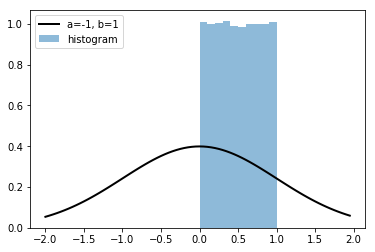

In [66]:
t = np.arange(-2, 2, 0.05)
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, normed=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.plot(t, stats.norm.pdf(t,mu, sigma), 'k-', lw=2, label='a=-1, b=1')
ax.legend()
plt.show()

# Zadanie 2
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami 

<ul>
<li>$\mu=\frac{1}{n}\sum_{i=1}^n x_i$</li>
<li>$\sigma=\frac{1}{n} \sum_{i=1}^n(x_i - \mu)^2$</li>
</ul>

In [67]:
N = 1000
mu= np.mean(data) 
sigma = np.std(data,ddof=0)
print(mu,sigma)

0.499646021045 0.289240540577


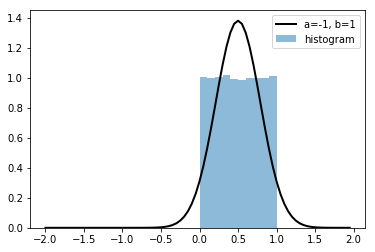

In [68]:
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, normed=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.plot(t, stats.norm.pdf(t,mu, sigma), 'k-', lw=2, label='a=-1, b=1')
ax.legend()
plt.show()

# Zadanie 3
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami otrzymanymi za pomocą funkcji <tt>fit()</tt> ze <tt>scipy.stats</tt>

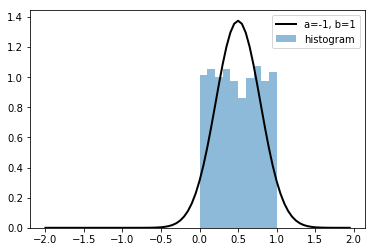

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.pyplot as plt


u=stats.uniform()
data = u.rvs(size=1000)

t = np.arange(-2, 2, 0.05)
N = 100000
mu, sigma = stats.norm.fit(data)

num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, normed=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.plot(t, stats.norm.pdf(t,mu, sigma), 'k-', lw=2, label='a=-1, b=1')
ax.legend()
plt.show()

# Zadanie 4

Wiemy, że funkcję wiarygodnosci ma postać:
$$
L(X,m,\sigma)=\prod\limits_{i=1}^n f_{m,\sigma} (x_i).
$$


Zaimplementuj logarytmiczną funkcję wiarygodności  dla rodziany rozkładów normalnych:
$$
l(X,m,\sigma)=\ln\left( L(X,m,\sigma) \right)=\ln\left(\prod\limits_{i=1}^n f_{m,\sigma} (x_i) \right)=\sum\limits_{i=1}^n \ln(f_{m,\sigma} (x_i))
$$

In [3]:
# split normal distribution pdf
def Gpdf(x, mu, sigma):
    return 1/(sigma * (2*np.pi)**.5) *np.e ** (-(x-mu)**2/(2 * sigma**2))

In [4]:
def mle(x):
    m, sigma = x
    s = 0
    for i in range(data.size):
        s += np.log( Gpdf(data[i], m, abs(sigma)) )
    return -1*s

x0 = np.asarray((0, 1))
print(mle(x0))

1085.89245814


# Zadanie 5
Policz MLE dal danych z rozkłdu jednostajnego i parametrów:
<ul>
<li>$\mu=0$, $\sigma=1$</li>
<li>$\mu=0$, $\sigma=2$</li>
<li>$\mu=1$, $\sigma=1$</li>
<li>$\mu=0.5$, $\sigma=0.2$</li>
</ul>
Dla których wartości wychodzi wynik największy i dlaczego?

In [5]:
x0 = np.asarray((0, 1))
print(mle(x0))
x0 = np.asarray((0, 2))
print(mle(x0))
x0 = np.asarray((1, 1))
print(mle(x0))
x0 = np.asarray((0.5, 0.2))
print(mle(x0))

1085.89245814
1653.824195
1086.1489419
361.554791115


# Zadanie 6
Zapoznaj się z funkcją <tt>optimize.fmin_cg</tt>
https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.optimize.fmin_cg.html
i znajdż minum funkcji

$$
f(x,y) = (x+1)^2+y^2
$$

In [8]:
def f(x):
    x1, x2 = x
    return (x1+1)**2+(x2)**2
x0 = np.asarray((0, 0))  # Initial guess.
res1 = optimize.fmin_cg(f, x0)
print(res1)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 16
         Gradient evaluations: 4
[ -1.00000001e+00  -7.45058060e-09]


# Zadanie 7
Zminimalizuj funkcją wiarygodności z Zad. 5 (numerycznie).

Czy wyniki są podobne do wyników z poprzednich zadań?

In [9]:
x0 = np.asarray((0, 1))
min_value = optimize.fmin_cg(mle, x0)
print(min_value)

         Current function value: 181.446123
         Iterations: 9
         Function evaluations: 367
         Gradient evaluations: 89
[ 0.49974351  0.29011078]


In [75]:
mu= min_value[0]
sigma = np.abs(min_value[1])

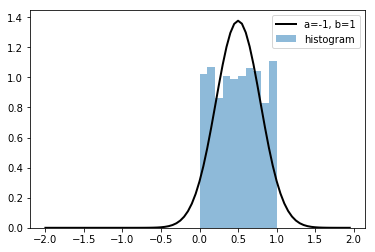

In [76]:
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, normed=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.plot(t, stats.norm.pdf(t,mu, sigma), 'k-', lw=2, label='a=-1, b=1')
ax.legend()
plt.show()

# Zadanie 8 (dla chętnych)
Wykonaj poprzednie zadanie wykorzystując pochodne http://faculty.washington.edu/ezivot/econ583/mleLectures.pdf.

# Zadanie 9
Napisz funkcję gęstości rozkładu Split Gaussian:

$$
SN(x;m,\sigma^2,\tau^2) = \left\{ \begin{array}{ll}
c \cdot \exp[-\frac{1}{2\sigma^2}(x-m)^2], & \textrm{for $x\leq m$},\\
c \cdot \exp[-\frac{1}{2\tau^2\sigma^2}(x-m)^2], & \textrm{for $x>m$},\\
\end{array} \right.
$$

gdzie $c=\sqrt{\frac{2}{\pi}}\sigma^{-1}(1+\tau)^{-1}$.

Narysuj gęstości dla parametrów:

<ul>
<li>$\mu=0$, $\sigma=1$, $\tau=1$</li>
<li>$\mu=0$, $\sigma=1$, $\tau=1/2$</li>
<li>$\mu=1$, $\sigma=1/2$, $\tau=1$</li>
</ul>

In [77]:
def SGpdf(x, mu, sigma, tau):
    c = (np.sqrt(2/np.pi))/(sigma+tau)
    if x < mu:
        z = c * np.exp(-(x-mu)*(x-mu) / (2*sigma*sigma))
    else:
        z = c * np.exp(-(x-mu)*(x-mu) / (2*tau*tau))
    return z

In [78]:
SGpdf_vec = np.vectorize(SGpdf)

C:\Users\przem85\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


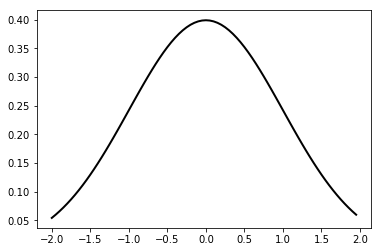

In [79]:
t = np.arange(-2, 2, 0.05)
fig, ax = plt.subplots(1, 1)
ax.plot(t, SGpdf_vec(t, 0 ,1, 1), 'k-', lw=2)
ax.legend()
plt.show()

C:\Users\przem85\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


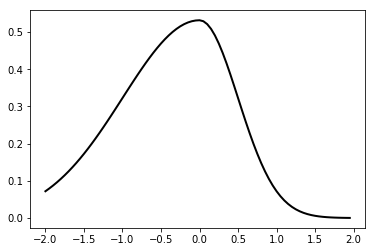

In [80]:
t = np.arange(-2, 2, 0.05)
fig, ax = plt.subplots(1, 1)
ax.plot(t, SGpdf_vec(t, 0 ,1, 1/2), 'k-', lw=2)
ax.legend()
plt.show()

C:\Users\przem85\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


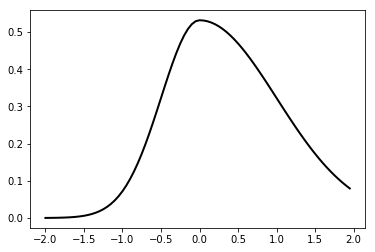

In [81]:
t = np.arange(-2, 2, 0.05)
fig, ax = plt.subplots(1, 1)
ax.plot(t, SGpdf_vec(t, 0 ,1/2, 1), 'k-', lw=2)
ax.legend()
plt.show()

# Zadanie 10

Wiemy, że funkcję wiarygodnosci ma postać:
$$
L(X,m,\sigma,\tau)=\prod\limits_{i=1}^n f_{m,\sigma,\tau} (x_i).
$$


Zaimplementuj logarytmiczną funkcję wiarygodności  dla rodziany rozkładów Split Normal:
$$
l(X,m,\sigma,\tau)=\ln\left( L(X,m,\sigma,\tau) \right)=\ln\left(\prod\limits_{i=1}^n f_{m,\sigma,\tau} (x_i) \right)=\sum\limits_{i=1}^n \ln(f_{m,\sigma,\tau} (x_i))
$$

In [82]:
def SG_mle(x):
    m, sigma, tau = x
    s = 0
    for i in range(data.size):
        s += np.log( SGpdf(data[i], m, abs(sigma), abs(tau)) )
    return -1*s

# Zadanie 11
Zminimalizuj funkcją wiarygodności z Zad. 10 (numerycznie).

In [83]:
x0 = np.asarray((0.5, 1, 1))
min_value = optimize.fmin_cg(SG_mle, x0)
print(min_value)

         Current function value: 178.659137
         Iterations: 27
         Function evaluations: 633
         Gradient evaluations: 124
[ 0.62588447  0.36208763  0.21651911]


In [84]:
m = min_value[0]
sigma = min_value[1]
tau = min_value[2]
print((m,sigma,tau))

(0.62588446957129495, 0.36208762605270822, 0.21651910740241173)


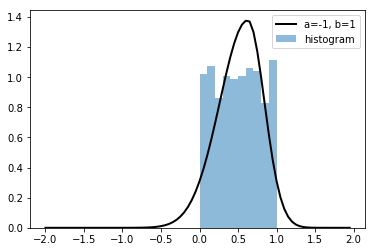

In [85]:
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, normed=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.plot(t, SGpdf_vec(t,m, sigma,tau), 'k-', lw=2, label='a=-1, b=1')
ax.legend()
plt.show()

# Zadanie 12
Zaiportuj dane <tt>datasets</tt> i wyestymuj rozkład normalny i Split Normla dla <tt>boston.data[:,7]</tt>.

Rozpocznij procedurę minimalizacji od warunku początkowego:

<ul>
<li>mu=np.mean(data)</li>
<li>sigma=np.std(data)</li>
<li>tau=np.std(data)</li>
</ul>

Który rozkład lepiej pasuje do danych?

In [86]:
from sklearn import datasets
boston = datasets.load_boston()
data=boston.data[:,7]

In [90]:
x0 = np.asarray((np.mean(data), np.std(data), np.std(data)))
min_value = optimize.fmin_cg(SG_mle, x0)
print(min_value)

         Current function value: 991.709615
         Iterations: 3
         Function evaluations: 647
         Gradient evaluations: 127
[  1.09614321e+00  -2.11225984e-09   3.64775085e+00]


In [91]:
m = min_value[0]
sigma = np.abs(min_value[1])
tau = np.abs(min_value[2])
print((m,sigma,tau))

(1.0961432113846317, 2.112259839259778e-09, 3.6477508490084007)


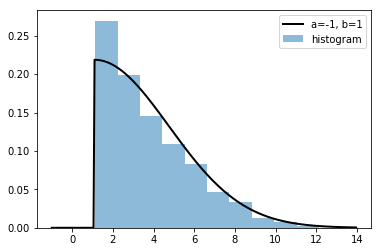

In [89]:
t = np.arange(-1, 14, 0.05)
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, normed=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.plot(t, SGpdf_vec(t,m, sigma,tau), 'k-', lw=2, label='a=-1, b=1')
ax.legend()
plt.show()

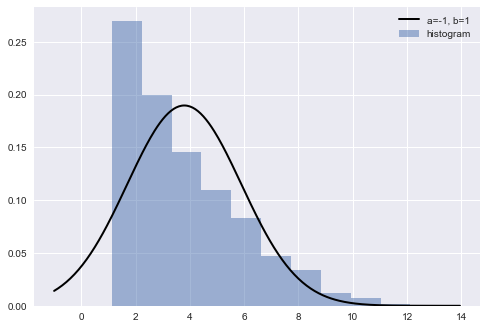

In [41]:
mu, sigma = stats.norm.fit(data)

num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, normed=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.plot(t, stats.norm.pdf(t,mu, sigma), 'k-', lw=2, label='a=-1, b=1')
ax.legend()
plt.show()